# Unsupervised Image Clustering

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




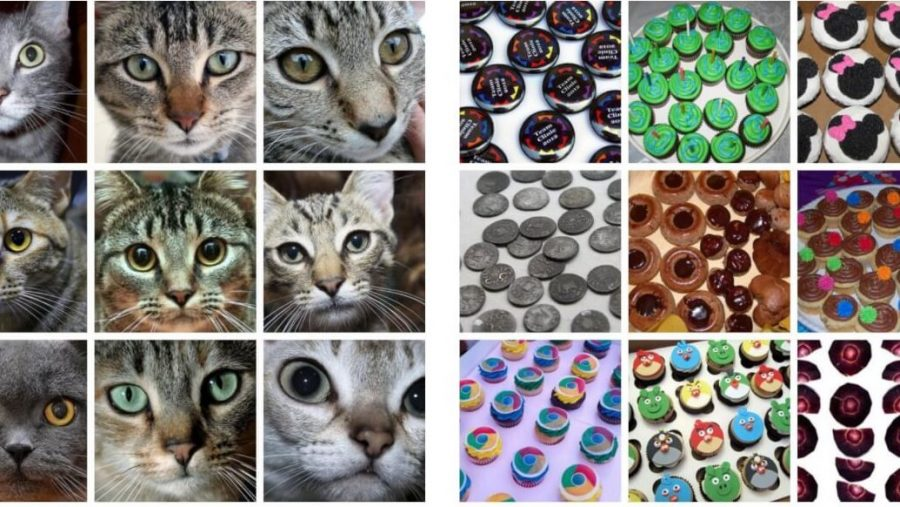

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [1]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.7 MB/s 
     |████████████████████████████████| 5.8 MB 63.8 MB/s 
     |████████████████████████████████| 1.3 MB 20.4 MB/s 
     |████████████████████████████████| 182 kB 75.3 MB/s 
     |████████████████████████████████| 7.6 MB 48.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=fc7036015eac86cdf3d42bae9e177f0f9833954cc80e85089c547b17cdb9fa59
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [3]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2022-12-26 14:50:41--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  14.0MB/s    in 2m 25s  

2022-12-26 14:53:07 (12.7 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [4]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [5]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print("Images:", len(img_names))

Images: 2000


In [6]:
model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [7]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

In [8]:
embeddings = img_embed
threshold = 0.8
min_community_size=5
init_max_size=1000

cos_scores = util.cos_sim(embeddings, embeddings)

In [9]:
cos_scores.shape

torch.Size([2000, 2000])

In [10]:
cos_scores

tensor([[1.0000, 0.6360, 0.6773,  ..., 0.6430, 0.6052, 0.7015],
        [0.6360, 1.0000, 0.5588,  ..., 0.7457, 0.7353, 0.7563],
        [0.6773, 0.5588, 1.0000,  ..., 0.6261, 0.6766, 0.6316],
        ...,
        [0.6430, 0.7457, 0.6261,  ..., 1.0000, 0.7079, 0.7789],
        [0.6052, 0.7353, 0.6766,  ..., 0.7079, 1.0000, 0.7271],
        [0.7015, 0.7563, 0.6316,  ..., 0.7789, 0.7271, 1.0000]],
       device='cuda:0')

In [11]:
top_k_values, _ = cos_scores.topk(k=min_community_size, largest=True)

In [12]:
top_k_values.shape

torch.Size([2000, 5])

In [13]:
extracted_communities = []
for i in range(len(top_k_values)):
  if top_k_values[i][-1] >= threshold:
    new_cluster = []

    top_val_large, top_idx_large = cos_scores[i].topk(k=init_max_size, largest=True)
    top_idx_large = top_idx_large.tolist()
    top_val_large = top_val_large.tolist()

    if top_val_large[-1] < threshold:
      for idx, val in zip(top_idx_large,top_val_large):
        if val<threshold:
          break
        
        new_cluster.append(idx)
    
    else:
      for idx,val in enumerate(cos_scores[i].tolist()):
        if val>=threshold:
          new_cluster.append(idx)


    extracted_communities.append(new_cluster)


extracted_communities = sorted(extracted_communities, key=lambda x: len(x), reverse=True)



In [14]:
len(extracted_communities)

1668

In [24]:
len(extracted_communities[0]),len(extracted_communities[33]),

(489, 364)

In [ ]:
extracted_communities[33]

In [15]:
unique_communities = []
extracted_ids = set()

for community in extracted_communities:
  add_cluster = True
  for idx in community:
    if idx in extracted_ids:
      add_cluster = False
      break

  if add_cluster:
    unique_communities.append(community)
    for idx in community:
      extracted_ids.add(idx)

In [16]:
len(unique_communities)

34

In [21]:
len(unique_communities[0]),len(unique_communities[33])

(489, 5)

In [23]:
unique_communities[33]

[1608, 794, 655, 1977, 1216]



Cluster Size:  489


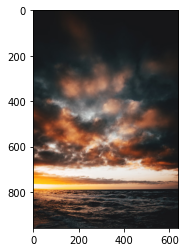

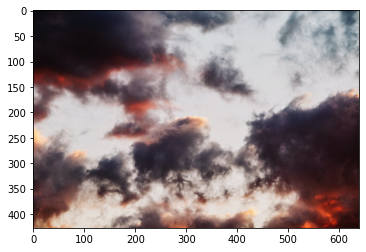

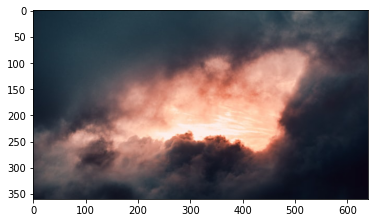



Cluster Size:  63


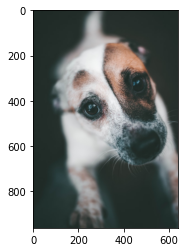

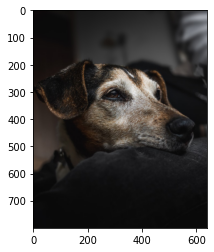

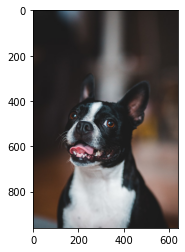



Cluster Size:  33


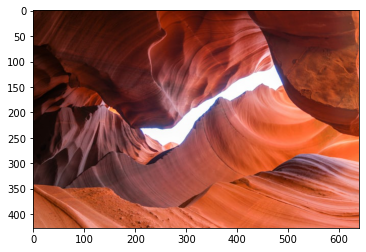

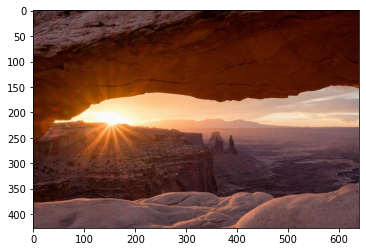

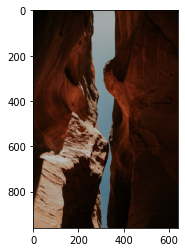



Cluster Size:  22


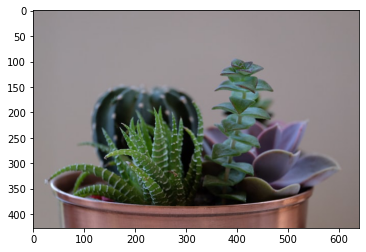

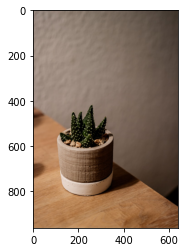

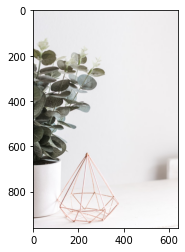



Cluster Size:  21


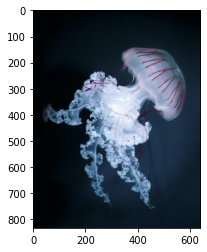

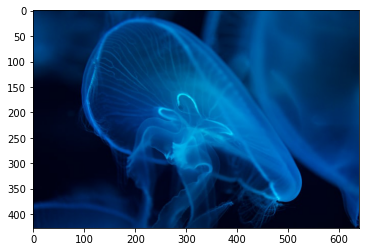

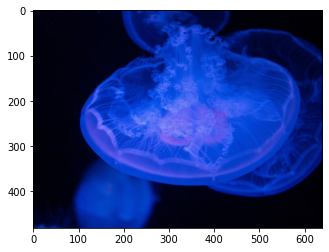



Cluster Size:  19


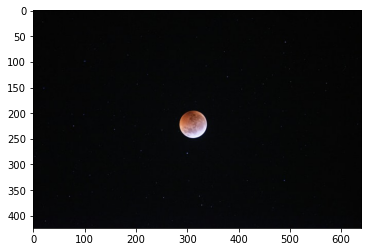

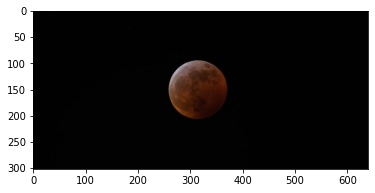

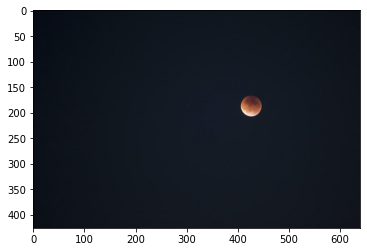



Cluster Size:  15


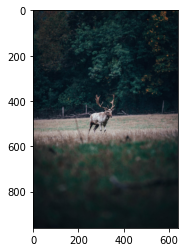

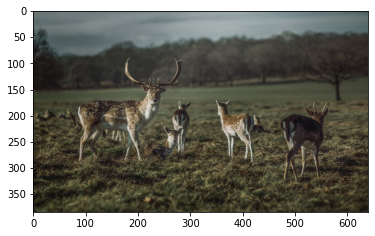

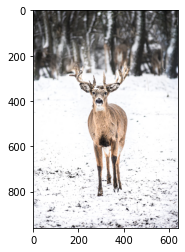



Cluster Size:  14


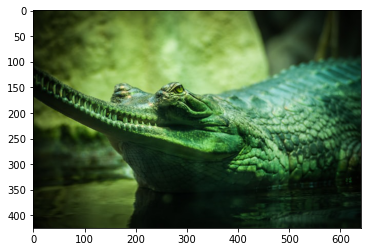

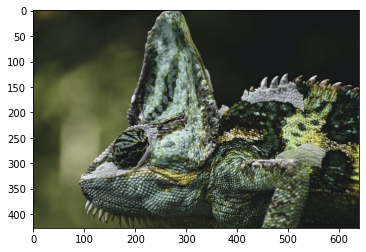

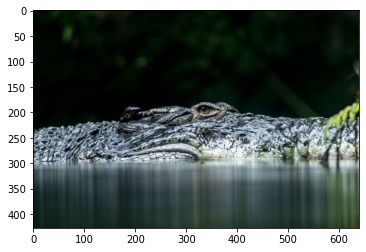



Cluster Size:  13


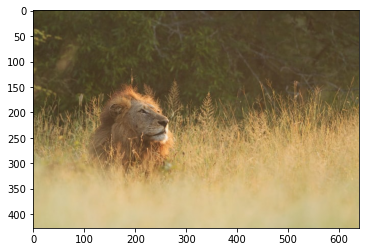

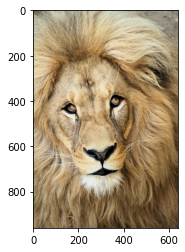

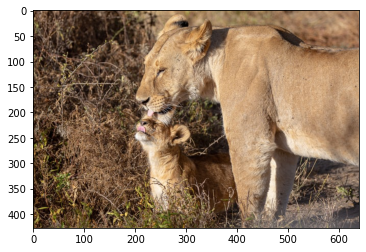



Cluster Size:  13


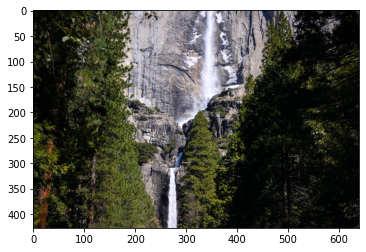

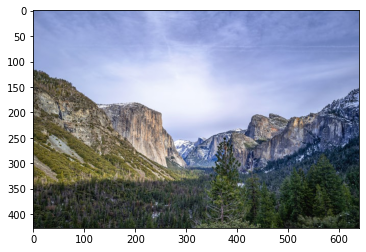

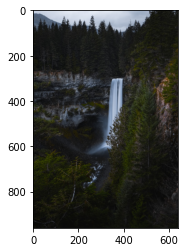

In [26]:
for cluster in unique_communities[0:10]:
  print("\n\nCluster Size: ", len(cluster))

  for idx in cluster[0:3]:
    img_path = img_names[idx]
    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()